<a href="https://colab.research.google.com/github/Jandsy/ml_finance_imperial/blob/main/Coursework/CourseWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Machine Learning and Finance </center>**


## <center> CourseWork 2024 - StatArb </center>



In this coursework, you will delve into and replicate selected elements of the research detailed in the paper **[End-to-End Policy Learning of a Statistical Arbitrage Autoencoder Architecture](https://arxiv.org/pdf/2402.08233.pdf)**. **However, we will not reproduce the entire study.**

## Overview

This study redefines Statistical Arbitrage (StatArb) by combining Autoencoder architectures and policy learning to generate trading strategies. Traditionally, StatArb involves finding the mean of a synthetic asset through classical or PCA-based methods before developing a mean reversion strategy. However, this paper proposes a data-driven approach using an Autoencoder trained on US stock returns, integrated into a neural network representing portfolio trading policies to output portfolio allocations directly.


## Coursework Goal

This coursework will replicate these results, providing hands-on experience in implementing and evaluating this innovative end-to-end policy learning Autoencoder within financial trading strategies.

## Outline

- [Data Preparation and Exploration](#Data-Preparation-and-Exploration)
- [Fama French Analysis](#Fama-French-Analysis)
- [PCA Analysis](#PCA-Analysis)
- [Ornstein Uhlenbeck](#Ornstein-Uhlenbeck)
- [Autoencoder Analysis](#Autoencoder-Analysis)



**Description:**
The Coursework is graded on a 100 point scale and is divided into five  parts. Below is the mark distribution for each question:

| **Problem**  | **Question**          | **Number of Marks** |
|--------------|-----------------------|---------------------|
| **Part A**   | Question 1            | 4                   |
|              | Question 2            | 1                   |
|              | Question 3            | 3                   |
|              | Question 4            | 3                   |
|              | Question 5            | 1                   |
|              | Question 6            | 3                   |
|**Part  B**    | Question 7           | 1                   |
|              | Question 8            | 5                   |
|              | Question 9            | 4                   |
|              | Question 10           | 5                   |
|              | Question 11           | 2                   |
|              | Question 12           | 3                   |
|**Part  C**    | Question 13          | 3                   |
|              | Question 14           | 1                   |
|              | Question 15           | 3                   |
|              | Question 16           | 2                   |
|              | Question 17           | 7                   |
|              | Question 18           | 6                   |
|              | Question 19           | 3                   |
|  **Part  D** | Question 20           | 3                   |
|              | Question 21           | 5                   |
|              | Question 22           | 2                   |
|  **Part  E** | Question 23           | 2                   |
|              | Question 24           | 1                   |
|              | Question 25           | 3                   |
|              | Question 26           | 10                  |
|              | Question 27           | 1                   |
|              | Question 28           | 3                   |
|              | Question 29           | 3                   |
|              | Question 30           | 7                   |




Please read the questions carefully and do your best. Good luck!

## Objectives



## 1. Data Preparation and Exploration
Collect, clean, and prepare US stock return data for analysis.

## 2. Fama French Analysis
Utilize Fama French Factors to isolate the idiosyncratic components of stock returns, differentiating them from market-wide effects. This analysis helps in understanding the unique characteristics of individual stocks relative to broader market trends.

## 3. PCA Analysis
Employ Principal Component Analysis (PCA) to identify hidden structures and reduce dimensionality in the data. This method helps in extracting significant patterns that might be obscured in high-dimensional datasets.

## 4. Ornstein-Uhlenbeck Process
Analyze mean-reverting behavior in stock prices using the Ornstein-Uhlenbeck process. This stochastic process is useful for modeling and forecasting based on the assumption that prices will revert to a long-term mean.

## 5. Building a Basic Autoencoder Model
Construct and train a standard Autoencoder to extract residual idiosyncratic risk.








# Data Preparation and Exploration


---
<font color=green>Q1: (4 Marks)</font>
<br><font color='green'>
Write a Python function that accepts a URL parameter and retrieves the NASDAQ-100 companies and their ticker symbols by scraping the relevant Wikipedia page using **[Requests](https://pypi.org/project/requests/)** and **[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)**. Your function should return the data as a list of tuples, with each tuple containing the company name and its ticker symbol. Then, call your function with the appropriate Wikipedia page URL and print the data in a 'Company: Ticker' format.

</font>

---


In [43]:
# Importing the requests module for making HTTP requests
import requests

# Importing BeautifulSoup for web scraping
from bs4 import BeautifulSoup 

def nasdaq_companies(url, table_id):
    website = requests.get(url)  # Sending a GET request to the specified URL
    soup = BeautifulSoup(website.text, 'html.parser')  # Parsing the HTML content using BeautifulSoup
    table = soup.find(id=table_id)  # Finding the table element with the specified ID
    table_rows = table.find_all('tr')[1:]  # Extracting all table rows except the header row
    companies_data = []
    for row in table_rows:
        cells = row.find_all('td')  # Extracting all cells in the row
        if len(cells) >= 2:
            company_name = cells[0].text  # Extracting the company name from the first cell
            ticker_symbol = cells[1].text  # Extracting the ticker symbol from the second cell
            companies_data.append((company_name, ticker_symbol))  # Appending the company data to the list
    return tuple(companies_data)

url = 'https://en.wikipedia.org/wiki/NASDAQ-100'
nasdaq = nasdaq_companies(url, table_id="constituents")  # Calling the function to get NASDAQ companies

for name in nasdaq:
    print(f'{name[0]}: {name[1]}')  # Printing the company name and ticker symbol

Adobe Inc.: ADBE
ADP: ADP
Airbnb: ABNB
Alphabet Inc. (Class A): GOOGL
Alphabet Inc. (Class C): GOOG
Amazon: AMZN
Advanced Micro Devices Inc.: AMD
American Electric Power: AEP
Amgen: AMGN
Analog Devices: ADI
Ansys: ANSS
Apple Inc.: AAPL
Applied Materials: AMAT
ASML Holding: ASML
AstraZeneca: AZN
Atlassian: TEAM
Autodesk: ADSK
Baker Hughes: BKR
Biogen: BIIB
Booking Holdings: BKNG
Broadcom Inc.: AVGO
Cadence Design Systems: CDNS
CDW Corporation: CDW
Charter Communications: CHTR
Cintas: CTAS
Cisco: CSCO
Coca-Cola Europacific Partners: CCEP
Cognizant: CTSH
Comcast: CMCSA
Constellation Energy: CEG
Copart: CPRT
CoStar Group: CSGP
Costco: COST
CrowdStrike: CRWD
CSX Corporation: CSX
Datadog: DDOG
DexCom: DXCM
Diamondback Energy: FANG
Dollar Tree: DLTR
DoorDash: DASH
Electronic Arts: EA
Exelon: EXC
Fastenal: FAST
Fortinet: FTNT
GE HealthCare: GEHC
Gilead Sciences: GILD
GlobalFoundries: GFS
Honeywell: HON
Idexx Laboratories: IDXX
Illumina, Inc.: ILMN
Intel: INTC
Intuit: INTU
Intuitive Surgical: I

In [44]:
def get_nasdaq_companies(url, table_id):
    """
    Retrieves the list of NASDAQ companies from the specified URL and table ID.

    Args:
        url (str): The URL of the webpage containing the NASDAQ companies table.
        table_id (str): The ID of the HTML table containing the NASDAQ companies.

    Returns:
        list: A list of NASDAQ companies.

    Raises:
        Exception: If there is an error retrieving the NASDAQ companies.

    """
    output = nasdaq_companies(url, table_id="constituents")
    return output

output = get_nasdaq_companies(url, table_id="constituents")
data_type = type(output)
print(data_type)

<class 'tuple'>


---
<font color=green>Q2: (1 Mark)</font>
<br><font color='green'>
Given a list of tuples representing NASDAQ-100 companies (where each tuple contains a company name and its ticker symbol), write a Python script to extract all ticker symbols into a separate list called `tickers_list`.
</font>
---


In [45]:
tickers_list = []
for company in nasdaq:
    ticker_symbol = company[1]
    tickers_list.append(ticker_symbol)

tickers_list

['ADBE',
 'ADP',
 'ABNB',
 'GOOGL',
 'GOOG',
 'AMZN',
 'AMD',
 'AEP',
 'AMGN',
 'ADI',
 'ANSS',
 'AAPL',
 'AMAT',
 'ASML',
 'AZN',
 'TEAM',
 'ADSK',
 'BKR',
 'BIIB',
 'BKNG',
 'AVGO',
 'CDNS',
 'CDW',
 'CHTR',
 'CTAS',
 'CSCO',
 'CCEP',
 'CTSH',
 'CMCSA',
 'CEG',
 'CPRT',
 'CSGP',
 'COST',
 'CRWD',
 'CSX',
 'DDOG',
 'DXCM',
 'FANG',
 'DLTR',
 'DASH',
 'EA',
 'EXC',
 'FAST',
 'FTNT',
 'GEHC',
 'GILD',
 'GFS',
 'HON',
 'IDXX',
 'ILMN',
 'INTC',
 'INTU',
 'ISRG',
 'KDP',
 'KLAC',
 'KHC',
 'LRCX',
 'LIN',
 'LULU',
 'MAR',
 'MRVL',
 'MELI',
 'META',
 'MCHP',
 'MU',
 'MSFT',
 'MRNA',
 'MDLZ',
 'MDB',
 'MNST',
 'NFLX',
 'NVDA',
 'NXPI',
 'ORLY',
 'ODFL',
 'ON',
 'PCAR',
 'PANW',
 'PAYX',
 'PYPL',
 'PDD',
 'PEP',
 'QCOM',
 'REGN',
 'ROP',
 'ROST',
 'SIRI',
 'SBUX',
 'SNPS',
 'TTWO',
 'TMUS',
 'TSLA',
 'TXN',
 'TTD',
 'VRSK',
 'VRTX',
 'WBA',
 'WBD',
 'WDAY',
 'XEL',
 'ZS']

---
<font color=green>Q3: (3 Marks)</font>
<br><font color='green'>
Using **[yfinance](https://pypi.org/project/yfinance/)** library, write a Python script that accepts a list of stock ticker symbols. For each symbol, download the adjusted closing price data, store it in a dictionary with the ticker symbol as the key, and then convert the final dictionary into a Pandas DataFrame. Handle any errors encountered during data retrieval by printing a message indicating which symbol failed
</font>
---

In [46]:
import yfinance as yf
import pandas as pd

def download_stock_data(tickers_list):
    stock_data = {}  # Dictionary to store stock data
    for ticker in tickers_list:
        try:
            stock = yf.Ticker(ticker)  # Fetch the stock data
            hist = stock.history(period="max")  # Download the historical data
            stock_data[ticker] = hist['Close']  # Store the adjusted closing prices
        except Exception as e:
            print(f"Failed to retrieve data for {ticker}: {e}")
    return stock_data

# Download stock data
stock_data = download_stock_data(tickers_list)

# Convert the dictionary to a Pandas DataFrame
stock_df = pd.DataFrame(stock_data)
stock_df.index = stock_df.index.date

stock_df  # Print the DataFrame


,ADBE,ADP,ABNB,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,...,TSLA,TXN,TTD,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZS
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.950191,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.948460,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.934614,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.913845,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.906922,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-03,439.019989,244.020004,146.250000,173.169998,174.419998,178.339996,163.550003,90.080002,307.420013,231.290009,...,176.289993,193.720001,93.110001,253.750000,470.179993,15.920000,8.330,210.830002,55.279999,169.020004
2024-06-04,448.369995,245.669998,147.080002,173.789993,175.130005,179.339996,159.990005,90.379997,307.369995,230.630005,...,174.770004,193.300003,94.480003,258.250000,474.950012,16.110001,8.240,211.119995,56.029999,169.139999
2024-06-05,455.799988,245.779999,145.779999,175.410004,177.070007,181.279999,166.169998,88.949997,307.380005,235.679993,...,175.000000,196.080002,97.410004,261.279999,483.040009,15.940000,8.300,212.460007,55.160000,174.570007
2024-06-06,458.130005,247.970001,147.000000,176.729996,178.350006,185.000000,166.779999,88.699997,305.690002,237.410004,...,177.940002,196.240005,97.190002,260.000000,485.529999,15.860000,8.340,214.949997,54.820000,178.929993


---
<font color=green>Q4: (3 Marks)</font>
<br><font color='green'>
Write a Python script to analyze stock data stored in a dictionary `stock_data` (where each key is a stock ticker symbol, and each value is a Pandas Series of adjusted closing prices). The script should:
1. Convert the dictionary into a DataFrame.
2. Calculate the daily returns for each stock.
3. Identify columns (ticker symbols) with at least 2000 non-NaN values in their daily returns.
4. Create a new DataFrame that only includes these filtered ticker symbols.
5. Remove any remaining rows with NaN values in this new DataFrame.
</font>

---

In [47]:
import pandas as pd

def analyze_stock_data(stock_data):
    """
    Analyzes the stock data by calculating daily returns, filtering columns with at least 2000 non-NaN values,
    removing rows with NaN values, and converting the index to date format.
    
    Parameters:
    stock_data (dict): A dictionary containing stock data with ticker symbols as keys and price data as values.
    
    Returns:
    pandas.DataFrame: A DataFrame containing the filtered stock data with daily returns, filtered columns, and date index.
    """
    
    # Convert the dictionary to a DataFrame
    stock_df = pd.DataFrame(stock_data)
    
    # Calculate daily returns for each stock
    daily_returns = stock_df.pct_change()
    
    # Identify columns with at least 2000 non-NaN values in their daily returns
    accepted_columns = daily_returns.columns[daily_returns.count() >= 2000]
    
    # Create a new DataFrame with filtered ticker symbols
    filtered_df = daily_returns[accepted_columns]
    
    # Remove remaining rows with NaN values
    filtered_df.dropna(inplace=True)
    
    filtered_df.index = filtered_df.index.date
    
    return filtered_df


filtered_stock_data = analyze_stock_data(stock_data)

# Print the filtered DataFrame
filtered_stock_data  


/var/folders/wp/tw2jj_bx35gcj53hl67z_4nc0000gn/T/ipykernel_88595/4091264949.py:19: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  daily_returns = stock_df.pct_change()
/var/folders/wp/tw2jj_bx35gcj53hl67z_4nc0000gn/T/ipykernel_88595/4091264949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(inplace=True)


,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
2015-12-10,-0.006699,0.006004,-0.003292,-0.002861,-0.003715,0.042553,-0.024355,0.011274,0.008826,0.004968,...,-0.004777,0.007485,0.011358,0.002995,-0.002615,0.010279,0.000960,-0.002109,0.005037,-0.013889
2015-12-11,0.027653,-0.024924,-0.012657,-0.014130,-0.033473,-0.036735,-0.005831,-0.028308,-0.003849,-0.013951,...,-0.011575,-0.009356,-0.044259,-0.012647,-0.015995,-0.034709,-0.020499,-0.035928,-0.057630,0.004311
2015-12-14,0.020127,0.015241,0.016151,0.012045,0.027744,-0.008475,-0.000367,0.019078,-0.001932,0.003899,...,0.005141,0.014444,0.007188,0.000178,0.014390,-0.016491,0.010402,-0.033613,0.000253,0.010017
2015-12-15,0.008149,0.010284,-0.003213,-0.005844,0.001110,0.008547,0.027503,0.028524,-0.004752,0.009544,...,0.023018,0.044907,0.011483,0.023657,0.013924,0.013656,-0.005451,0.002646,-0.000380,0.007934
2015-12-16,0.016380,0.008541,0.021708,0.019761,0.026008,0.076271,0.017309,0.012053,0.017330,0.008354,...,0.006389,0.025419,0.060699,0.009035,0.021117,0.010658,0.031665,0.024887,0.029378,0.023896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-03,-0.012906,-0.003675,0.003884,0.002644,0.010768,-0.020072,-0.001884,0.005133,-0.009723,-0.008505,...,0.020454,-0.010745,-0.010052,-0.006615,0.003837,0.032591,-0.018496,0.010922,-0.002932,-0.003066
2024-06-04,0.021297,0.006762,0.003580,0.004071,0.005607,-0.021767,0.003330,-0.000163,-0.002854,0.007466,...,0.014178,0.027906,-0.008622,-0.002168,0.017734,0.010145,0.011935,-0.010804,0.001375,0.013567
2024-06-05,0.016571,0.000448,0.009322,0.011077,0.010817,0.038627,-0.015822,0.000033,0.021896,0.031441,...,0.008857,0.013265,0.001316,0.014382,0.011733,0.017033,-0.010553,0.007282,0.006347,-0.015527
2024-06-06,0.005112,0.008910,0.007525,0.007229,0.020521,0.003671,-0.002811,-0.005498,0.007341,-0.007154,...,-0.010512,-0.002774,0.016800,0.000816,-0.004899,0.005155,-0.005019,0.004819,0.011720,-0.006164


---
<font color=green>Q5: (1 Mark)</font>
<br><font color='green'>
Download the dataset named `df_filtered_nasdaq_100` from the GitHub repository of the course.
</font>

---

In [48]:
# Import the necessary libraries
import ssl


url = 'http://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Coursework/df_filtered_nasdaq_100.csv'

# Visual Studio Code made me import ssl to ensure security, may not be needed when run in Google Colab
ssl._create_default_https_context = ssl._create_unverified_context

# Read the file and call it a dataframe
df_filtered_nasdaq_100 = pd.read_csv(url,index_col='Date', parse_dates=True)

# Print out the data
df_filtered_nasdaq_100.head()

,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-10,-0.006699,0.006004,-0.003292,-0.002861,-0.003715,0.042553,-0.024356,0.011274,0.008826,0.004968,...,-0.004777,0.007485,0.011358,0.002996,-0.002616,0.010279,0.000960,-0.002109,0.005037,-0.013889
2015-12-11,0.027653,-0.024924,-0.012657,-0.014130,-0.033473,-0.036735,-0.005831,-0.028308,-0.003850,-0.013951,...,-0.011575,-0.009356,-0.044259,-0.012648,-0.015996,-0.034709,-0.020499,-0.035928,-0.057630,0.004311
2015-12-14,0.020127,0.015241,0.016151,0.012045,0.027744,-0.008475,-0.000366,0.019078,-0.001932,0.003899,...,0.005141,0.014444,0.007188,0.000178,0.014390,-0.016491,0.010402,-0.033613,0.000253,0.010017
2015-12-15,0.008149,0.010283,-0.003213,-0.005844,0.001110,0.008547,0.027503,0.028525,-0.004752,0.009544,...,0.023018,0.044907,0.011483,0.023657,0.013923,0.013656,-0.005450,0.002646,-0.000380,0.007934
2015-12-16,0.016380,0.008541,0.021708,0.019761,0.026008,0.076271,0.017309,0.012053,0.017330,0.008354,...,0.006389,0.025419,0.060699,0.009036,0.021117,0.010658,0.031664,0.024887,0.029378,0.023897


---
<font color=green>Q6: (3 Marks) </font>
<br><font color='green'>
Conduct an in-depth analysis of the `df_filtered_nasdaq_100` dataset from GitHub. Answer the following questions:
- Which stock had the best performance over the entire period?
- What is the average daily return of 'AAPL'?
- What is the worst daily return? Provide the stock name and the date it occurred.
</font>

---

In [49]:
# Calculate the cumulative return of each stock to determine the best performer over the entire period
cumulative_returns = df_filtered_nasdaq_100.add(1).cumprod().iloc[-1] - 1
best_performer = cumulative_returns.idxmax()
best_performance = cumulative_returns.max()

# Calculate the average daily return of 'AAPL'
average_daily_return_aapl = df_filtered_nasdaq_100['AAPL'].mean()

# Find the worst daily return across all stocks and the corresponding date and stock
worst_daily_return = df_filtered_nasdaq_100.min().min()
worst_stock = df_filtered_nasdaq_100.min().idxmin()
worst_date = df_filtered_nasdaq_100.idxmin()[worst_stock].date()

# Print out the results
print(f"Best performing stock over the entire period: {best_performer} with a cumulative return of {best_performance*100:.2f}%")
print(f"Average daily return of 'AAPL': {average_daily_return_aapl*100:.2f}%")
print(f"Worst daily return occurred for {worst_stock} on {worst_date}, return: {worst_daily_return*100:.2f}%")
print(cumulative_returns['NVDA'])

Best performing stock over the entire period: NVDA with a cumulative return of 11158.84%
Average daily return of 'AAPL': 0.11%
Worst daily return occurred for FANG on 2020-03-09, return: -44.65%
111.58842785050534


# Fama French Analysis

The Fama-French five-factor model is an extension of the classic three-factor model used in finance to describe stock returns. It is designed to better capture the risk associated with stocks and explain differences in returns. This model includes the following factors:

1. **Market Risk (MKT)**: The excess return of the market over the risk-free rate. It captures the overall market's premium.
2. **Size (SMB, "Small Minus Big")**: The performance of small-cap stocks relative to large-cap stocks.
3. **Value (HML, "High Minus Low")**: The performance of stocks with high book-to-market values relative to those with low book-to-market values.
4. **Profitability (RMW, "Robust Minus Weak")**: The difference in returns between companies with robust (high) and weak (low) profitability.
5. **Investment (CMA, "Conservative Minus Aggressive")**: The difference in returns between companies that invest conservatively and those that invest aggressively.

## Additional Factor

6. **Momentum (MOM)**: This factor represents the tendency of stocks that have performed well in the past to continue performing well, and the reverse for stocks that have performed poorly.

### Mathematical Representation

The return of a stock $R_i^t$ at time $t$ can be modeled as follows :

$$
R_i^t - R_f^t = \alpha_i^t + \beta_{i,MKT}^t(R_M^t - R_f^t) + \beta_{i,SMB}^t \cdot SMB^t + \beta_{i,HML}^t \cdot HML^t + \beta_{i,RMW}^t \cdot RMW^t + \beta_{i,CMA}^t \cdot CMA^t + \beta_{i,MOM}^t \cdot MOM^t + \epsilon_i^t
$$

Where:
- $ R_i^t $ is the return of stock $i$ at time $t$
- $R_f^t $is the risk-free rate at time $t$
- $ R_M^t $ is the market return at time $t$
- $\alpha_i^t $ is the abnormal return or alpha of stock $ i $ at time $t$
- $\beta^t $ coefficients represent the sensitivity of the stock returns to each factor at time $t$
- $\epsilon_i^t $ is the error term or idiosyncratic risk unique to stock $ i $ at time $t$

This model is particularly useful for identifying which factors significantly impact stock returns and for constructing a diversified portfolio that is optimized for given risk preferences.




---
<font color=green>Q7: (1 Mark) </font>
<br><font color='green'>
Download the `fama_french_dataset` from the course's GitHub account.
</font>

---

In [50]:
#import ssl

url = 'http://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Coursework/fama_french_dataset.csv'
# Visual Studio Code made me import ssl to ensure security, may not be needed when run in Google Colab
ssl._create_default_https_context = ssl._create_unverified_context

# Read the file of the fama french data
fama_french_data = pd.read_csv(url, index_col=0)

# Print the first few rows of the dataset
fama_french_data.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
1963-07-01,-0.67,0.02,-0.35,0.03,0.13,0.012,-0.21
1963-07-02,0.79,-0.28,0.28,-0.08,-0.21,0.012,0.42
1963-07-03,0.63,-0.18,-0.10,0.13,-0.25,0.012,0.41
1963-07-05,0.40,0.09,-0.28,0.07,-0.30,0.012,0.07
1963-07-08,-0.63,0.07,-0.20,-0.27,0.06,0.012,-0.45


In [51]:
# Print the last few rows of the dataset
fama_french_data.tail()

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
2024-03-22,-0.23,-0.98,-0.53,0.29,-0.37,0.021,0.43
2024-03-25,-0.26,-0.10,0.88,-0.22,-0.17,0.021,-0.34
2024-03-26,-0.26,0.10,-0.13,-0.50,0.23,0.021,0.09
2024-03-27,0.88,1.29,0.91,-0.14,0.58,0.021,-1.34
2024-03-28,0.10,0.45,0.48,-0.07,0.09,0.021,-0.44


---
<font color=green>Q8: (5 Marks)</font>
<br><font color='green'>

Write a Python function called `get_sub_df_ticker(ticker, date, df_filtered, length_history)` that extracts a historical sub-dataframe for a given `ticker` from `df_filtered`. The function should use `length_history` to determine the number of trading days to include, ending at the specified `date`. Return the sub-dataframe for the specified `ticker`.
</font>

---


In [52]:
# Import the necessary libraries
import ssl

url = 'http://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Coursework/df_filtered_nasdaq_100.csv'

# Visual Studio Code made me import ssl to ensure security, may not be needed when run in Google Colab
ssl._create_default_https_context = ssl._create_unverified_context

# Read the file from url
df_filtered = pd.read_csv(url, index_col=0)


In [53]:
# Import the necessary libraries
from datetime import datetime,timedelta
import pandas as pd

def get_sub_df_ticker(ticker, date, df_filtered, length_history):

    # Convert index to datetime if not already
    if not isinstance(df_filtered.index, pd.DatetimeIndex):
        df_filtered.index = pd.to_datetime(df_filtered.index)

    # Validate input date
    try:
        end_date = pd.to_datetime(date)
    except ValueError:
        raise ValueError("The date provided is not in a recognisable format. Please use 'YYYY-MM-DD' format.")

    # Check if the date is within the range
    if end_date not in df_filtered.index:
        available_start = df_filtered.index.min()
        available_end = df_filtered.index.max()
        if end_date < available_start or end_date > available_end:
            raise ValueError(f"The date provided is out of the available data range ({available_start.date()} to {available_end.date()}).")
        end_date = df_filtered.index[df_filtered.index <= end_date].max()

    # Find the position of the end_date in the index
    end_date_index = df_filtered.index.get_loc(end_date)

    # Determine the start_date_index by subtracting length_history
    start_date_index = max(0, end_date_index - length_history + 1)

    # Get the actual start_date from the index
    start_date = df_filtered.index[start_date_index]

    # Create a sub dataframe with the specified ticker and date range
    sub_dataframe = df_filtered.loc[start_date:end_date, [ticker]].copy()

    return sub_dataframe

# Testing to confirm if the function is working or not
get_sub_df_ticker("FANG", '2020-03-10', df_filtered, 4) 

,FANG
Date,
2020-03-05,-0.046831
2020-03-06,-0.165779
2020-03-09,-0.446458
2020-03-10,0.104167


---
<font color=green>Q9: (4 Marks)</font>
<br><font color='green'>
Create a Python function named `df_ticker_with_fama_french(ticker, date, df_filtered, length_history, fama_french_data)` that uses `get_sub_df_ticker` to extract historical data for a specific `ticker`. Incorporate the Fama-French factors from `fama_french_data` into the extracted sub-dataframe. Adjust the ticker's returns by subtracting the risk-free rate ('RF') and add other relevant Fama-French factors ('Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', and 'Mom'). Return the resulting sub-dataframe.
</font>

---

In [54]:
def df_ticker_with_fama_french(ticker, date, df_filtered, length_history, fama_french_data):
    """
    Merges the filtered DataFrame with Fama-French data based on ticker and date.

    Args:
        ticker (str): Ticker symbol of the stock.
        date (str): Date in the format 'YYYY-MM-DD'.
        df_filtered (pd.DataFrame): Filtered DataFrame containing stock data.
        length_history (int): Number of historical data points to consider.
        fama_french_data (pd.DataFrame): DataFrame containing Fama-French data.

    Returns:
        pd.DataFrame: Merged DataFrame with Fama-French data.

    """
    # Convert index to datetime if not already
    for df in [df_filtered, fama_french_data]:
        if not isinstance(df.index, pd.DatetimeIndex):
            df.index = pd.to_datetime(df.index)
    
    # Get a sub DataFrame based on ticker, date, and length_history
    sub_df = get_sub_df_ticker(ticker, date, df_filtered, length_history)

    # Merge sub DataFrame with Fama-French data
    merged_df = sub_df.join(fama_french_data, how='left') # or inner
    merged_df["Excess Returns"] = merged_df[ticker] - merged_df["RF"] 
    return merged_df

df_ticker_with_fama_french("FANG", '2020-03-10', df_filtered, 4, fama_french_data)

,FANG,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom,Excess Returns
Date,,,,,,,,,
2020-03-05,-0.046831,-3.38,-0.14,-1.40,-0.88,0.05,0.006,0.46,-0.052831
2020-03-06,-0.165779,-1.78,-0.21,-1.49,0.69,0.34,0.006,0.46,-0.171779
2020-03-09,-0.446458,-7.78,-1.33,-4.75,0.08,0.46,0.006,3.22,-0.452458
2020-03-10,0.104167,4.74,-2.39,0.81,0.52,0.06,0.006,0.57,0.098167


---
<font color=green>Q10: (5 Marks) </font>
<br><font color='green'>
Write a Python function named `extract_beta_fama_french` to perform a rolling regression analysis for a given stock at a specific time point using the Fama-French model. The function should accept the following parameters:

- `ticker`: A string indicating the stock symbol.
- `date`: A string specifying the date for the analysis.
- `length_history`: An integer representing the number of days of historical data to include.
- `df_filtered`: A pandas DataFrame (assumed to be derived from question 5) containing filtered stock data.
- `fama_french_data`: A pandas DataFrame (assumed to be from question 7) that includes Fama-French factors.

Utilize the `statsmodels.api` library to conduct the regression.
</font>

---

In [55]:
import statsmodels.api as sm

def extract_beta_fama_french(ticker, date, df_filtered, length_history, fama_french_data):
    """
    Extracts the beta using Fama-French factors for a given ticker and date.

    Parameters:
    ticker (str): The ticker symbol of the stock.
    date (str): The date for which the beta is calculated.
    df_filtered (pandas.DataFrame): The filtered dataframe containing the stock data.
    length_history (int): The length of historical data to consider for beta calculation.
    fama_french_data (pandas.DataFrame): The Fama-French factors data.

    Returns:
    statsmodels.regression.linear_model.RegressionResultsWrapper: The regression model object.

    """

    # Get the data for regression
    data_for_regression = df_ticker_with_fama_french(ticker, date, df_filtered, length_history, fama_french_data)
    
    # Extract the independent variables
    constant_x = data_for_regression[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA','Mom']] 
    
    # Extract the dependent variable
    predictor = data_for_regression['Excess Returns'] 
    
    # Add a constant term to the independent variables
    constant = sm.add_constant(constant_x)  
    
    # Fit the regression model
    model = sm.OLS(predictor, constant).fit() 
    
    # Return the model
    return model

---
<font color=green>Q11: (2 Marks) </font>
<br><font color='green'>
Apply the `extract_beta_fama_french` function to the stock symbol 'AAPL' for the date '2024-03-28', using a historical data length of 252 days. Ensure that the `df_filtered` and `fama_french_data` DataFrames are correctly prepared and available in your environment before executing this function. The parameters for the function call are set as follows:

- **Ticker**: 'AAPL'
- **Date**: '2024-03-28'
- **Length of History**: 252 days
</font>

---



In [56]:
# Define the ticker, date, length history and the result

ticker = 'AAPL'
date = '2024-03-28'
length_history = 252
result = extract_beta_fama_french(ticker, date, df_filtered, length_history, fama_french_data)


---
<font color=green>Q12: (2 Marks)</font>
<br><font color='green'>
Once the `extract_beta_fama_french` function has been applied to 'AAPL' with the specified parameters, the next step is to analyze the regression summary to identify which Fama-French factor explains the most variance in 'AAPL' returns during the specified period.

Follow these steps to perform the analysis:

1. **Review the Summary**: Examine the regression output, focusing on the coefficients and their statistical significance (p-values).
2. **Identify Key Factor**: Determine which factor has the highest absolute coefficient value and is statistically significant (typically p < 0.05). This factor can be considered as having the strongest influence on 'AAPL' returns for the period.

</font>

---

**Write your answers here:**

In [57]:
# Print out the summaries
summary =result.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Excess Returns   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     36.96
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           9.04e-32
Time:                        15:44:53   Log-Likelihood:                 827.28
No. Observations:                 252   AIC:                            -1641.
Df Residuals:                     245   BIC:                            -1616.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0207      0.001    -35.204      0.000      -0.022      -0.020
Mkt-RF         0.0111      0.001     11.966      0.000       0.009       0.013
SMB            0.0008      0.001      0.690      0.491      -0.001       0.003
HML           -0.0076      0.001     -5.762      0.000      -0.010      -0.005
RMW            0.0053      0.001      3.607      0.000       0.002       0.008
CMA            0.0019      0.002      1.052      0.294      -0.002       0.006
Mom           -0.0015      0.001     -1.592      0.113      -0.003       0.000
==============================================================================
Omnibus:                       36.898   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.475
Skew:                          -0.702   Prob(JB):                     7.48e-19
Kurtosis:                       5.445   Cond. No.                         4.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
print("\nRegression Summary:\n", summary)


Regression Summary:
                             OLS Regression Results                            
Dep. Variable:         Excess Returns   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     36.96
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           9.04e-32
Time:                        15:44:53   Log-Likelihood:                 827.28
No. Observations:                 252   AIC:                            -1641.
Df Residuals:                     245   BIC:                            -1616.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0207      0.0

In [59]:
p_values = result.pvalues
print("P-Values:\n", p_values)

P-Values:
 const     8.072684e-98
Mkt-RF    2.723353e-26
SMB       4.908369e-01
HML       2.481186e-08
RMW       3.759857e-04
CMA       2.940650e-01
Mom       1.126391e-01
dtype: float64


In [60]:
coefficients = result.params
coefficients


const    -0.020742
Mkt-RF    0.011080
SMB       0.000766
HML      -0.007594
RMW       0.005255
CMA       0.001945
Mom      -0.001470
dtype: float64

In [61]:
# Filtering factors that are statistically significant
significant_factors = coefficients[p_values < 0.05]

# Sorting the significant factors by their absolute coefficients in descending order
sorted_factors = significant_factors.sort_values(ascending=False)

top_two_factors = sorted_factors.head(1)

# Print the top two factors and their coefficients
for factor in top_two_factors.index:
    print("Factor:", factor, "Coefficient:", significant_factors[factor])

Factor: Mkt-RF Coefficient: 0.011079574327502763


As calculated above, for the ticker 'AAPL' on the 28th of March 2024, using 252 days as the data length, the most significant factor is the 'Mkt-RF' factor, representing the market risk premium, with a coefficient of 0.0111, indicating a positive and substantial impact on Excess Returns. This is statistically significant with a p-value less than 0.05. Additionally, the 'HML' factor, which accounts for the difference between high and low book-to-market stocks, also shows a significant negative influence with a coefficient of -0.0076. Despite its negative value, its impact is considerable, underscored by its statistical significance. These findings suggest that market risk and value factors are important in driving the Excess Returns, with the market risk premium being the most crucial determinant from this regression analysis.

# PCA Analysis


In literature, another method exists for extracting residuals for each stock, utilizing the PCA approach to identify hidden factors in the data. Let's describe this method.

The return of a stock $R_i^t$ at time $t$ can be modeled as follows :

$$
R_i^t  = \sum_{j=1}^m\beta_{i,j}^t F_j^t  + \epsilon_i^t
$$

Where:
- $ R_i^t $ is the return of stock $i$ at time $t$
- $m$ is the number of factors selected from PCA
-  $ F_j^t $ is the $j$-th hidden factor constructed from PCA at time $t$
- $\beta_{i,j}^t $ are the coefficients representing the sensitivity of the stock returns to each hidden factor.
- $\epsilon_i^t $  is the residual term for stock $i$ at time $t$, representing the portion of the return not explained by the PCA factors.

### Representation of Stock Return Data

Consider the return data for $N$ stocks over $T$ periods, represented by the matrix $R$ of size $T \times N$:

$$
R = \left[
\begin{array}{cccc}
R_1^T & R_2^T & \cdots & R_N^T \\
R_1^{T-1} & R_2^{T-1} & \cdots & R_N^{T-1} \\
\vdots & \vdots & \ddots & \vdots \\
R_1^1 & R_2^1 & \cdots & R_N^1 \\
\end{array}
\right]
$$

Each element $R_i^k$ of the matrix represents the return of stock $i$ at time $k$ and is defined as:

$$
R_i^k = \frac{S_{i,k} - S_{i, k-1}}{S_{i, k-1}}, \quad k=1,\cdots, T, \quad i=1,\cdots,N
$$

where $S_{i,k}$ denotes the adjusted close price of stock $i$ at time $k$.

### Standardization of Returns

To adjust for varying volatilities across stocks, we standardize the returns as follows:

$$
Z_i^t = \frac{R_i^t - \mu_i}{\sigma_i}
$$

where $\mu_i$ and $\sigma_i$ are the mean and standard deviation of returns for stock $i$ over the period $[t-T, t]$, respectively.

### Empirical Correlation Matrix

The empirical correlation matrix $C$ is computed from the standardized returns:

$$
C = \frac{1}{T-1} Z^T Z
$$

where $Z^T$ is the transpose of matrix $Z$.

### Singular Value Decomposition (SVD)

We apply Singular Value Decomposition to the correlation matrix $C$:

$$
C = U \Sigma V^T
$$

Here, $U$ and $V$ are orthogonal matrices representing the left and right singular vectors, respectively, and $\Sigma$ is a diagonal matrix containing the singular values, which are the square roots of the eigenvalues.

### Construction of Hidden Factors

For each of the top $m$ components, we construct the selected hidden factors as follows:

$$
F_j^t = \sum_{i=1}^N \frac{\lambda_{i,j}}{\sigma_i} R_i^t
$$

where $\lambda_{i,j}$ is the $i$-th component of the $j$-th eigenvector (ranked by eigenvalue magnitude).


---
<font color=green>Q13 (3 Marks):

For the specified period from March 29, 2023 ('2023-03-29'), to March 28, 2024 ('2024-03-28'), generate the matrix $Z$ by standardizing the stock returns using the DataFrame `df_filtered_new`
</font>

---


In [62]:
# Generate the new dataframe within the specified dated
df_filtered_new = df_filtered.loc['2023-03-29':'2024-03-28']
df_filtered_new

,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-29,0.015426,0.026850,0.003563,0.005328,0.030954,0.016180,0.013156,0.010693,0.030338,0.007428,...,0.009693,0.007143,0.024790,0.020001,0.013639,0.003160,0.009758,0.012431,0.045181,0.017431
2023-03-30,0.007226,-0.001864,-0.004931,-0.005692,0.017456,0.018628,0.003662,0.001950,0.026643,0.018652,...,-0.000686,0.005285,0.007221,0.017676,0.003732,-0.006619,0.014056,0.012960,0.009079,0.005561
2023-03-31,0.009086,0.014306,0.028150,0.026451,0.012647,0.001328,0.006193,0.001035,0.015499,0.020734,...,0.023244,0.001868,0.062372,0.009607,0.004713,0.009322,-0.001444,0.016835,0.032442,0.007921
2023-04-03,-0.013727,-0.026142,0.006073,0.008750,-0.008520,-0.014794,-0.000989,0.011127,-0.004766,-0.010216,...,-0.005113,0.013256,-0.061168,-0.009946,-0.001459,0.003999,0.025448,-0.019205,-0.010506,0.001186
2023-04-04,0.013339,-0.012776,0.003450,0.002002,0.015038,-0.007146,0.002970,0.012641,-0.005910,-0.001943,...,0.024855,-0.003066,-0.011244,-0.020417,-0.005168,-0.006038,0.010998,0.022957,-0.008661,0.013774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,-0.022944,-0.005383,0.021477,0.020371,0.004042,0.005429,-0.001805,-0.002816,-0.008404,0.002987,...,0.001906,-0.001988,-0.011515,-0.000637,-0.004451,-0.000120,-0.010577,-0.032110,0.003653,-0.000574
2024-03-25,0.015435,-0.013772,-0.004643,-0.004085,0.004696,-0.005678,-0.000964,0.016837,-0.014883,-0.004925,...,-0.041454,0.003175,0.010537,-0.009450,-0.012177,0.000890,0.002430,0.002370,-0.006559,0.004018
2024-03-26,0.000729,0.003563,0.003998,0.003639,-0.007846,-0.004255,-0.004706,0.003383,-0.008760,0.006676,...,0.003627,-0.000124,0.029195,-0.017208,-0.003405,0.005841,-0.005817,-0.009456,0.006167,-0.012957


In [63]:
# Generate the Z Matrix
Z = (df_filtered_new - df_filtered_new.mean()) / df_filtered_new.std()
Z

,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-29,0.658925,2.189521,0.106285,0.207821,1.503570,0.444433,1.020467,0.727398,1.860839,0.356414,...,0.517876,0.615242,0.814986,1.344650,1.105776,0.127319,0.497115,0.429736,2.277783,1.269711
2023-03-30,0.273051,-0.221306,-0.389329,-0.434766,0.787034,0.526996,0.277291,0.076716,1.630406,0.936497,...,-0.109884,0.439972,0.233493,1.187056,0.239468,-0.525980,0.691243,0.446100,0.389915,0.430715
2023-03-31,0.360570,1.136308,1.540732,1.439604,0.531735,-0.056439,0.475365,0.008639,0.935425,1.044069,...,1.337544,0.117646,2.058867,0.640237,0.325258,0.538943,-0.008816,0.565842,1.611597,0.597545
2023-04-03,-0.713053,-2.259591,0.252735,0.407399,-0.591892,-0.600163,-0.086824,0.759731,-0.328378,-0.555499,...,-0.377687,1.191774,-2.030038,-0.684867,-0.214460,0.183344,1.205798,-0.547975,-0.634285,0.121519
2023-04-04,0.560730,-1.137430,0.099652,0.013877,0.658632,-0.342217,0.223111,0.872403,-0.399698,-0.127907,...,1.434972,-0.347689,-0.377655,-1.394525,-0.538698,-0.487155,0.553153,0.755053,-0.537767,1.011197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,-1.146803,-0.516681,1.151431,1.085070,0.074915,0.081847,-0.150701,-0.278013,-0.555224,0.126867,...,0.046870,-0.246035,-0.386620,-0.054031,-0.476030,-0.091837,-0.421327,-0.946797,0.106149,-0.002851
2024-03-25,0.659349,-1.221008,-0.372489,-0.341074,0.109668,-0.292706,-0.084892,1.184710,-0.959285,-0.282029,...,-2.575803,0.240999,0.343241,-0.651297,-1.151639,-0.024341,0.166127,0.118796,-0.427841,0.321648
2024-03-26,-0.032708,0.234343,0.131651,0.109342,-0.556130,-0.244717,-0.377797,0.183364,-0.577464,0.317533,...,0.150958,-0.070195,0.960796,-1.177043,-0.384593,0.306386,-0.206326,-0.246683,0.237594,-0.878121


---
<font color=green>Q14: (1 Mark) </font>
<br><font color='green'>
Download the `Z_matrix` matrix from the course's GitHub account.
</font>

---

In [64]:
# Download the Z Matrix
url = 'https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Coursework/Z_matrix.csv'
Z_matrix = pd.read_csv(url,index_col=0)
Z_matrix

,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-29,0.658925,2.189521,0.106285,0.207821,1.503570,0.444433,1.020467,0.727398,1.860839,0.356414,...,0.517876,0.615242,0.814986,1.344650,1.105776,0.127319,0.497115,0.429736,2.277783,1.269711
2023-03-30,0.273051,-0.221306,-0.389329,-0.434766,0.787034,0.526996,0.277291,0.076716,1.630406,0.936497,...,-0.109884,0.439972,0.233493,1.187056,0.239468,-0.525980,0.691243,0.446100,0.389915,0.430715
2023-03-31,0.360570,1.136308,1.540732,1.439604,0.531735,-0.056439,0.475365,0.008639,0.935425,1.044069,...,1.337544,0.117646,2.058867,0.640237,0.325258,0.538943,-0.008816,0.565842,1.611597,0.597545
2023-04-03,-0.713053,-2.259591,0.252735,0.407399,-0.591892,-0.600163,-0.086824,0.759731,-0.328378,-0.555499,...,-0.377687,1.191774,-2.030038,-0.684867,-0.214460,0.183344,1.205798,-0.547975,-0.634285,0.121519
2023-04-04,0.560730,-1.137430,0.099652,0.013877,0.658632,-0.342217,0.223111,0.872403,-0.399698,-0.127907,...,1.434972,-0.347689,-0.377655,-1.394525,-0.538698,-0.487155,0.553153,0.755053,-0.537767,1.011197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,-1.146803,-0.516681,1.151431,1.085070,0.074915,0.081847,-0.150701,-0.278013,-0.555224,0.126867,...,0.046870,-0.246035,-0.386620,-0.054031,-0.476030,-0.091837,-0.421327,-0.946797,0.106149,-0.002851
2024-03-25,0.659349,-1.221008,-0.372489,-0.341074,0.109668,-0.292706,-0.084892,1.184710,-0.959285,-0.282029,...,-2.575803,0.240999,0.343241,-0.651297,-1.151639,-0.024341,0.166127,0.118796,-0.427841,0.321648
2024-03-26,-0.032708,0.234343,0.131651,0.109342,-0.556130,-0.244717,-0.377797,0.183364,-0.577464,0.317533,...,0.150958,-0.070195,0.960796,-1.177043,-0.384593,0.306386,-0.206326,-0.246683,0.237594,-0.878121


---
<font color=green>Q15: (3 Marks) </font>
<br><font color='green'>
For the specified period from March 29, 2023 ('2023-03-29'), to March 28, 2024 ('2024-03-28'), compute the correlation matrix
$C$ using the matrix `Z_matrix`.
</font>

---

In [65]:
# Calculate the Correlation Matrix manually by transposing the matrix
transpose = Z_matrix.shape[0]
corr_matrix = (1 / (transpose - 1))* Z_matrix.T.dot(Z_matrix)
corr_matrix

,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
ADBE,1.000000,0.218513,0.397890,0.400601,0.463488,0.444032,-0.035967,0.198781,0.321991,0.387483,...,0.257931,0.102167,0.268863,0.326597,0.171580,0.164760,0.033955,0.099841,0.418110,0.019105
ADP,0.218513,1.000000,0.294213,0.298841,0.168206,0.045884,0.228457,0.214813,0.279607,0.238355,...,0.290311,0.113985,0.178128,0.297954,0.325258,0.176771,0.142369,0.243986,0.320836,0.164682
GOOGL,0.397890,0.294213,1.000000,0.997415,0.521199,0.371105,-0.006803,0.118938,0.222252,0.292286,...,0.238219,0.086673,0.267941,0.192188,0.178622,0.142447,0.052710,0.042072,0.289137,0.025701
GOOG,0.400601,0.298841,0.997415,1.000000,0.525626,0.371568,-0.004037,0.118296,0.223710,0.294542,...,0.242111,0.091456,0.268114,0.198044,0.180110,0.146190,0.060822,0.045516,0.293575,0.026392
AMZN,0.463488,0.168206,0.521199,0.525626,1.000000,0.463049,-0.010849,0.123745,0.290872,0.342042,...,0.222346,0.120301,0.303368,0.299500,0.144325,0.104962,0.017926,0.162937,0.403757,-0.058870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRTX,0.164760,0.176771,0.142447,0.146190,0.104962,0.039540,0.239861,0.281759,0.110189,0.142121,...,0.180810,0.139184,0.144443,0.198258,0.251863,1.000000,0.159124,0.062726,0.101851,0.184369
WBA,0.033955,0.142369,0.052710,0.060822,0.017926,0.002629,0.309717,0.214701,0.208907,0.096813,...,0.115189,0.063538,0.168495,0.199627,0.038371,0.159124,1.000000,0.361533,0.010855,0.194839
WBD,0.099841,0.243986,0.042072,0.045516,0.162937,0.092733,0.325463,0.220342,0.310681,0.095919,...,0.129023,0.084315,0.282265,0.355450,0.002990,0.062726,0.361533,1.000000,0.160860,0.183837
WDAY,0.418110,0.320836,0.289137,0.293575,0.403757,0.334587,0.017659,0.068097,0.315426,0.382360,...,0.293949,0.142648,0.277744,0.346161,0.195588,0.101851,0.010855,0.160860,1.000000,-0.019310


---
<font color=green>Q16: (2 Marks) </font>
<br><font color='green'>
Refind the correlation matrix from the from March 29, 2023 ('2023-03-29'), to March 28, 2024 ('2024-03-28') using pandas correlation matrix method.
</font>

---

In [66]:
# Compute the correlation matrix using pandas
pandas_corr = Z_matrix.corr()
pandas_corr

,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
ADBE,1.000000,0.218513,0.397890,0.400601,0.463488,0.444032,-0.035967,0.198781,0.321991,0.387483,...,0.257931,0.102167,0.268863,0.326597,0.171580,0.164760,0.033955,0.099841,0.418110,0.019105
ADP,0.218513,1.000000,0.294213,0.298841,0.168206,0.045884,0.228457,0.214813,0.279607,0.238355,...,0.290311,0.113985,0.178128,0.297954,0.325258,0.176771,0.142369,0.243986,0.320836,0.164682
GOOGL,0.397890,0.294213,1.000000,0.997415,0.521199,0.371105,-0.006803,0.118938,0.222252,0.292286,...,0.238219,0.086673,0.267941,0.192188,0.178622,0.142447,0.052710,0.042072,0.289137,0.025701
GOOG,0.400601,0.298841,0.997415,1.000000,0.525626,0.371568,-0.004037,0.118296,0.223710,0.294542,...,0.242111,0.091456,0.268114,0.198044,0.180110,0.146190,0.060822,0.045516,0.293575,0.026392
AMZN,0.463488,0.168206,0.521199,0.525626,1.000000,0.463049,-0.010849,0.123745,0.290872,0.342042,...,0.222346,0.120301,0.303368,0.299500,0.144325,0.104962,0.017926,0.162937,0.403757,-0.058870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRTX,0.164760,0.176771,0.142447,0.146190,0.104962,0.039540,0.239861,0.281759,0.110189,0.142121,...,0.180810,0.139184,0.144443,0.198258,0.251863,1.000000,0.159124,0.062726,0.101851,0.184369
WBA,0.033955,0.142369,0.052710,0.060822,0.017926,0.002629,0.309717,0.214701,0.208907,0.096813,...,0.115189,0.063538,0.168495,0.199627,0.038371,0.159124,1.000000,0.361533,0.010855,0.194839
WBD,0.099841,0.243986,0.042072,0.045516,0.162937,0.092733,0.325463,0.220342,0.310681,0.095919,...,0.129023,0.084315,0.282265,0.355450,0.002990,0.062726,0.361533,1.000000,0.160860,0.183837
WDAY,0.418110,0.320836,0.289137,0.293575,0.403757,0.334587,0.017659,0.068097,0.315426,0.382360,...,0.293949,0.142648,0.277744,0.346161,0.195588,0.101851,0.010855,0.160860,1.000000,-0.019310


---
<font color=green>Q17: (7 Marks) </font>
<br><font color='green'>
Conduct Singular Value Decomposition on the correlation matrix $C$. Follow these steps:


1.   **Perform SVD**: Decompose the matrix $C$ into its singular values and vectors.
2.   **Rank Eigenvalues**: Sort the resulting singular values (often squared to compare to eigenvalues) in descending order.
3. **Select Components**: Extract the first 20 components based on the largest singular values.
4. **Variance Explained**: Print the variance explained by the first 20 Components and dimensions of differents matrix that you created.

</font>

---

In [67]:
import numpy as np
# Perform Singular Value Decomposition (SVD) on C
U, Sigma, Vt = np.linalg.svd(pandas_corr) #U is eigen vectors

# Rank eigenvalues
eigenvalues = Sigma**2

# Select the top 20 components
top_20_indices = np.argsort(eigenvalues)[-20:][::-1]
top_20_eigenvalues = eigenvalues[top_20_indices]

# Variance Explained
total_variance = np.sum(eigenvalues)
variance_explained = top_20_eigenvalues / total_variance * 100
cumulative_variance_explained = np.cumsum(variance_explained)

variance_df = pd.DataFrame({
    "Component": range(1, 21),
    "Variance (%)": variance_explained,
    "Cumulative Variance (%)": cumulative_variance_explained
})

print("Variance explained by the top 20 components:")
print(variance_df.to_string(index=False))

top_20_U = U[:, top_20_indices]
top_20_Sigma = np.diag(Sigma[top_20_indices])
top_20_Vt = Vt[top_20_indices, :]

# Print dimensions of the matrices
print("\nDimensions of the matrices created:")
print("Shape of correlation matrix C:", pandas_corr.shape)
print(f"U matrix shape: {U.shape}")
print(f"Sigma (as a diagonal matrix) shape: {np.diag(Sigma).shape}")
print(f"Vt matrix shape: {Vt.shape}")


Variance explained by the top 20 components:
 Component  Variance (%)  Cumulative Variance (%)
         1     78.617886                78.617886
         2      8.648550                87.266436
         3      2.462599                89.729035
         4      1.223756                90.952791
         5      1.065625                92.018417
         6      0.673085                92.691502
         7      0.554871                93.246372
         8      0.498553                93.744925
         9      0.486848                94.231773
        10      0.417346                94.649118
        11      0.369662                95.018781
        12      0.336624                95.355404
        13      0.315847                95.671251
        14      0.281594                95.952845
        15      0.251950                96.204795
        16      0.228393                96.433188
        17      0.220505                96.653692
        18      0.211658                96.865351
     

---
<font color=green>Q18: (6 Marks) </font>
<br><font color='green'>
Extract the 20 hidden factors in a matrix F. Check that shape of F is $(252,20)$
</font>

</font>

---

In [68]:
# SVD process
U, Sigma, V_t = np.linalg.svd(pandas_corr)

# Formula to calculate eignenvalue
Eigenvalues = Sigma ** 2 


sorted_ev = np.sort(Eigenvalues)[::-1] # Sort in descending order

# Find out the top 20 eigenvalues
top_eigenvalues = sorted_ev[:20] 


In [69]:
U_first_components = U[:, :20]
Sigma_first_components = np.diag(Sigma[:20])

# Calculate returns, lambda and R
std_returns = df_filtered_new.std()
Lambda = V_t.T[:, :20]
R = df_filtered_new.values

# F matrix
F = np.zeros((R.shape[0], 20))

# Extract the 20 hidden factors in F matrix
for j in range(20):
    for t in range(R.shape[0]):
        F[t, j] = np.sum((Lambda[:, j] / std_returns.values) * R[t, :])
        
F

array([[-10.42428276,  -1.13807494,  -1.48029262, ...,   1.23955006,
          2.27676229,  -0.13751588],
       [ -4.05837617,   0.78059648,  -0.86611386, ...,  -0.36262048,
         -0.97011478,  -0.91996453],
       [ -7.95739081,  -2.27970763,   1.48389609, ...,   0.05732551,
         -0.36311986,  -0.11338118],
       ...,
       [  0.88061846,   0.13735036,   1.12187707, ...,  -0.17879579,
          0.09227425,   0.16559638],
       [ -5.48903391,  -4.97318897,  -3.13593018, ...,  -1.29272596,
         -0.13181172,   0.74442252],
       [ -0.52987874,  -1.28782948,  -0.79107298, ...,  -0.58448879,
          0.61863981,   0.69301072]])

In [70]:
# Verify the shape of F
print(f"Shape of matrix F is", F.shape)

Shape of matrix F is (252, 20)


---
<font color=green>Q19: (3 Marks) </font>
<br><font color='green'>
Perform the Regression Analysis of 'AAPL' for the date '2024-03-28', using a historical data length of 252 days using previous $F$ Matrix. Compare the R-squared from the ones obtained at Q11.
</font>

</font>

---

In [71]:
import statsmodels.api as sm
aapl_returns = Z['AAPL'].values[:252]

In [72]:
import statsmodels.api as sm
aapl_returns = Z['AAPL'].values[:252]
X = F
#print(X)
y = aapl_returns
#print(aapl_returns)
X = sm.add_constant(X)
#print(sm.add_constant(X))

# Regression
model_hidden_factors = sm.OLS(y, X).fit()
print(model_hidden_factors.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     18.48
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           2.29e-37
Time:                        15:44:53   Log-Likelihood:                -236.67
No. Observations:                 252   AIC:                             515.3
Df Residuals:                     231   BIC:                             589.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0721      0.042     -1.705      0.0

In [73]:
# Calculate the r squared hidden factors and fama french
r_squared_hidden_factors = model_hidden_factors.rsquared
r_squared_fama_french = result.rsquared
print("Comparison of R-squared values:")
print("R-squared value from Fama-French model:", r_squared_fama_french)
print("R-squared value from hidden factors model:", r_squared_hidden_factors)

# Check to see which value is higher and print out the statement which is correct in this context
if r_squared_hidden_factors > r_squared_fama_french:
    print("The model using hidden factors explains more variance in 'AAPL' returns.")
else:
    print("The Fama-French model explains more variance in 'AAPL' returns.")


Comparison of R-squared values:
R-squared value from Fama-French model: 0.47510269580608755
R-squared value from hidden factors model: 0.6154020479750231
The model using hidden factors explains more variance in 'AAPL' returns.


# Ornstein Uhlenbeck

The Ornstein-Uhlenbeck process is defined by the following stochastic differential equation (SDE):

$$ dX_t = \theta (\mu - X_t) dt + \sigma dW_t $$

where:

- **$ X_t $**: The value of the process at time $ t $.
- **$ \mu $**: The long-term mean (equilibrium level) to which the process reverts.
- **$ \theta $**: The speed of reversion or the rate at which the process returns to the mean.
- **$ \sigma $**: The volatility (standard deviation), representing the magnitude of random fluctuations.
- **$ W_t $**: A Wiener process or Brownian motion that adds stochastic (random) noise.

This equation describes a process where the variable $ X_t $ moves towards the mean $ \mu $ at a rate determined by $ \theta $, with random noise added by $ \sigma dW_t $.

---
<font color=green>Q20: (3 Marks) </font>
<br><font color='green'>
In the context of mean reversion, which quantity should be modeled using an Ornstein-Uhlenbeck process?
</font>

---




The Ornstein-Uhlenbeck (OU) process is typically used to model quantities that exhibit mean-reverting behavior. In finance, the following quantities are often modeled using an OU process: Interest Rates, Asset Returns, Volatility and Equity Prices in Spread Trading.

A particularly insightful application of the OU process is in the modeling of residuals from asset pricing models. In the specific context of this problem, the residuals from asset pricing models are the quantities of interest. Residuals represent the deviations of observed market prices from the values predicted by models. These deviations, when modeled as an OU process, help in identifying when the predictions diverge from actual market behaviors, indicating a potential reversion to the mean. This approach not only enhances the accuracy of financial models but also identifies potential market inefficiencies.

According to Avellaneda and Lee (2010), the mean-reverting nature of residuals can be captured effectively using the OU process. This method underscores the dynamic nature of financial markets, where deviations from expected behaviors are temporary and likely to revert to a state of equilibrium.

---
<font color=green>Q21: (5 Marks) </font>
<br><font color='green'>
Explain how the parameters $ \theta $ and $ \sigma $ can be determined using the following equations. Also, detail the underlying assumptions:
$$ E[X] = \mu $$
$$ \text{Var}[X] = \frac{\sigma^2}{2\theta} $$
</font>

---

**Write your answers here:**


- **Estimating \(\theta\) (Speed of Reversion)**:
  $$ \theta = \frac{\sigma^2}{2 \times \text{Var}[X]} $$
  This formula rearranges to solve for \(\theta\) when \(\sigma^2\) and \(\text{Var}[X]\) are known or estimated from the data.

- **Estimating \(\sigma\) (Volatility)**:
  $$ \sigma = \sqrt{2\theta \times \text{Var}[X]} $$
  Once \(\theta\) is known, \(\sigma\) can be calculated if \(\text{Var}[X]\) is measured or estimated from the data.

### Underlying Assumptions

To accurately apply these formulas for \(\theta\) and \(\sigma\), several assumptions are made:
1. **Stationarity**: The process \(X_t\) is assumed to reach a stationary distribution.
2. **Normality of Increments**: The increments driven by the Wiener process (\(dW_t\)) are normally distributed.
3. **Continuous Observation**: The process is ideally observed continuously, though high-frequency discrete data can approximate this.
4. **Independence of Increments**: Increments of the Wiener process are independent.
5. **Mean Reversion**: The process exhibits mean-reverting behavior, a defining characteristic of the OU process.

These assumptions are critical for the validity of the parameter estimation process, which can be implemented through statistical methods such as maximum likelihood estimation or the method of moments based on the observed data.



## Estimating Parameters of the Ornstein-Uhlenbeck Process

### Linear Regression Approach

To estimate the parameters of the Ornstein-Uhlenbeck process, we consider a linear regression model where the rate of change of the process, \(dX_t\), can be expressed in terms of \(X_t\). Specifically, the differential form \(dX_t = \theta(\mu - X_t)dt + \sigma dW_t\) is transformed into a regression model:

$$
\frac{dX_t}{dt} = a + bX_t + \epsilon
$$

Here, the coefficients are related to the parameters of the Ornstein-Uhlenbeck process by:
- $$a = \theta\mu$$
- $$b = -\theta$$

From these relations, the parameters \(\theta\) and \(\mu\) can be extracted as. The standard deviation of the noise, \(\sigma\), is estimated from the standard deviation of the residuals, \(\epsilon\), in the regression.

### Variance Estimation

The Ornstein-Uhlenbeck process is solved explicitly by defining a transformed variable \(Y_t = X_t e^{\theta t}\), which simplifies using Ito's Lemma.
Integrating, the solution for \(X_t\) is expressed as:

$$
X_t = X_0 e^{-\theta t} + \mu(1 - e^{-\theta t}) + \sigma \int_0^t e^{\theta(s-t)} dW_s
$$

This solution leads to the expected value and variance of \(X_t\):
- Expected value \(E[X_t]\) stabilizes at \(\mu\) as \(t \to \infty\).
- The variance $$\text{Var}(X_t)$$ is derived through Ito isometry:

$$
\text{Var}(X_t) = \sigma^2 \int_0^t e^{-2\theta(t-s)} ds = \frac{\sigma^2}{2\theta}(1 - e^{-2\theta t})
$$

This result aligns with the long-term behavior of the process, confirming that \(\text{Var}(X_t)\) approaches \(\frac{\sigma^2}{2\theta}\) as \(t\) approaches infinity.


The derivation and analysis presented above demonstrate a comprehensive approach to estimating the mean-reversion speed theta and the volatility sigma in the Ornstein-Uhlenbeck process. This method combines regression techniques with stochastic calculus, providing a robust framework for parameter estimation in mean-reverting stochastic processes.



---
<font color=green>Q22: (2 Marks) </font>
<br><font color='green'>
Create a function named `extract_s_scores` which computes 's scores' for the last element in a list of floating-point numbers. This function calculates the scores using the following formula $ \text{s scores} = \frac{X_T - \mu}{\sigma} $ where `list_xi` represents a list containing a sequence of floating-point numbers $(X_0, \cdots, X_T)$.

</font>

---

In [74]:
def extract_s_scores(list_xi):
    """
    Computes the 's scores' for the last element in a list of floating-point numbers.

    Args:
    list_xi (list of float): A list containing a sequence of floating-point numbers (X0, ..., XT).

    Returns:
    float: The 's score' for the last element in the list.
    """
    if not list_xi:
        raise ValueError("The list cannot be empty.")

    # Calculate the mean and standard deviation of the list
    mu = sum(list_xi) / len(list_xi)
    sigma = (sum((x - mu) ** 2 for x in list_xi) / len(list_xi)) ** 0.5

    # Last element in the list
    x_t = list_xi[-1]

    # Calculate s score using the formula
    s_score = (x_t - mu) / sigma

    return s_score


# Autoencoder Analysis

Autoencoders are neural networks used for unsupervised learning, particularly for dimensionality reduction and feature extraction. Training an autoencoder on the $Z_i$ matrix aims to identify hidden factors capturing the intrinsic structures in financial data.

### Architecture
- **Encoder**: Compresses input data into a smaller latent space representation.
  - *Input Layer*: Matches the number of features in the $Z_i$ matrix.
  - *Hidden Layers*: Compress data through progressively smaller layers.
  - *Latent Space*: Encodes the data into hidden factors.
- **Decoder**: Reconstructs input data from the latent space.
  - *Hidden Layers*: Gradually expand to the original dimension.
  - *Output Layer*: Matches the input layer to recreate the original matrix.

### Training
The autoencoder is trained by minimizing reconstruction loss, usually mean squared error (MSE), between the input $Z_i$ matrix and the decoder's output.

### Hidden Factors Extraction
After training, the encoder's latent space provides the most important underlying patterns in the stock returns.

---
<font color=green>Q23: (2 Marks) </font>
<br><font color='green'>
Modify the standardized returns matrix `Z_matrix` to reduce the influence of extreme outliers on model trainingby ensuring that all values in the matrix `Z_matrix` do not exceed 3 standard deviations from the mean. Specifically, cap these values at the interval $-3, 3]$. Store the adjusted values in a new matrix, `Z_hat`.
</font>

----

In [75]:
import numpy as np

def cap_values(Z_matrix):
    """
    Caps all values in the matrix to be within the interval [-3, 3].

    Args:
    Z_matrix (np.array): The input standardized returns matrix Z.

    Returns:
    np.array: The adjusted matrix Z_hat with values capped within [-3, 3].
    """
    # Define the limits
    lower_cap = -3
    upper_cap = 3

    # Apply the cap to each element in the Z matrix
    Z_hat = np.clip(Z_matrix, lower_cap, upper_cap)

    return Z_hat

---
<font color=green>Q24: (1 Marks) </font>
<br><font color='green'>
Fetch the `Z_hat` data from GitHub, and we'll proceed with it now.
</font>



In [76]:
import ssl
url = "https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Coursework/Z_hat.csv"
ssl._create_default_https_context = ssl._create_unverified_context

z_hat = pd.read_csv(url, index_col=0)
z_hat.head()

,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-29,0.658925,2.189521,0.106285,0.207821,1.503570,0.444433,1.020467,0.727398,1.860839,0.356414,...,0.517876,0.615242,0.814986,1.344650,1.105776,0.127319,0.497115,0.429736,2.277783,1.269711
2023-03-30,0.273051,-0.221306,-0.389329,-0.434766,0.787034,0.526996,0.277291,0.076716,1.630406,0.936497,...,-0.109884,0.439972,0.233493,1.187056,0.239468,-0.525980,0.691243,0.446100,0.389915,0.430715
2023-03-31,0.360570,1.136308,1.540732,1.439604,0.531735,-0.056439,0.475365,0.008639,0.935425,1.044069,...,1.337544,0.117646,2.058867,0.640237,0.325258,0.538943,-0.008816,0.565842,1.611597,0.597545
2023-04-03,-0.713053,-2.259591,0.252735,0.407399,-0.591892,-0.600163,-0.086824,0.759731,-0.328378,-0.555499,...,-0.377687,1.191774,-2.030038,-0.684867,-0.214460,0.183344,1.205798,-0.547975,-0.634285,0.121519
2023-04-04,0.560730,-1.137430,0.099652,0.013877,0.658632,-0.342217,0.223111,0.872403,-0.399698,-0.127907,...,1.434972,-0.347689,-0.377655,-1.394525,-0.538698,-0.487155,0.553153,0.755053,-0.537767,1.011197


---
<font color=green>Q25: (3 Marks) </font>
<br><font color='green'>
Segment the standardized and capped returns matrix $\hat{Z}$ into two subsets for model training and testing. Precisly Allocate 70% of the data in $\hat{Z}$ to the training set $ \hat{Z}_{train} $ and Allocate the remaining 30% to the testing set $\hat{Z}_{test}$. Treat each stock within $\hat{Z}$ as an individual sample, by flattening temporal dependencies.
</font>



In [77]:
import pandas as pd
import ssl
import math



# URL to fetch the Z_hat data
url = "https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Coursework/Z_hat.csv"
ssl._create_default_https_context = ssl._create_unverified_context

# Read the CSV data into a DataFrame
z_hat = pd.read_csv(url, index_col=0)

# Check if NVDA stock is in the DataFrame
assert 'NVDA' in z_hat.columns, "NVDA stock not found in the dataset."

# Transpose the DataFrame to treat each stock as an individual sample
z_hat_T = z_hat.T

# Extract NVDA stock and drop it from the main dataset
nvda_stock = z_hat_T.loc[['NVDA']]
remaining_stocks = z_hat_T.drop('NVDA')

# Determine the number of stocks for training (62) and testing (27)
num_stocks = remaining_stocks.shape[0]
train_size = math.floor(z_hat_T.shape[0]*0.7)  # Training set should have 70% stocks
test_size = z_hat_T.shape[0]-train_size  # Testing set should have 30% stocks, excluding NVDA

# Split the remaining stocks into training and testing sets
train_stocks = remaining_stocks.iloc[:train_size]
test_stocks = remaining_stocks.iloc[train_size:(train_size + test_size - 1)] # -1 to accommodate NVDA

# Append NVDA to the test set
test_stocks = pd.concat([test_stocks, nvda_stock])

# Check sizes
print(f"Training set size: {train_stocks.shape[0]} stocks")
print(f"Testing set size: {test_stocks.shape[0]} stocks")

# Ensure the sizes are correct
assert train_stocks.shape[0] == train_size, "Training set size is incorrect."
assert test_stocks.shape[0] == test_size, "Testing set size is incorrect."

# Transpose back to original shape
z_hat_train = train_stocks
z_hat_test = test_stocks

# Print the results of the training and testing set
print("Training Set:")
print(z_hat_train.head())

print("\nTesting Set:")
print(z_hat_test.head())

Training set size: 62 stocks
Testing set size: 27 stocks
Training Set:
Date   2023-03-29  2023-03-30  2023-03-31  2023-04-03  2023-04-04  2023-04-05  \
ADBE     0.658925    0.273051    0.360570   -0.713053    0.560730   -0.449491   
ADP      2.189521   -0.221306    1.136308   -2.259591   -1.137430   -0.406031   
GOOGL    0.106285   -0.389329    1.540732    0.252735    0.099652   -0.240895   
GOOG     0.207821   -0.434766    1.439604    0.407399    0.013877   -0.197159   
AMZN     1.503570    0.787034    0.531735   -0.591892    0.658632   -1.595048   

Date   2023-04-06  2023-04-10  2023-04-11  2023-04-12  ...  2024-03-15  \
ADBE    -0.241966   -0.604917   -0.709950   -0.221744  ...   -3.000000   
ADP      1.093156   -0.799022    0.323227    0.091276  ...   -0.465146   
GOOGL    2.104351   -1.167096   -0.699080   -0.494813  ...   -0.884422   
GOOG     2.091914   -1.147042   -0.555401   -0.597410  ...   -0.979539   
AMZN     0.364438   -0.082414   -1.308663   -1.249982  ...   -1.425537  

---
<font color=green>Q26: (10 Marks) </font>
<br><font color='green'>
Please create an autoencoder following the instructions provided in  **[End-to-End Policy Learning of a Statistical Arbitrage Autoencoder Architecture](https://arxiv.org/pdf/2402.08233.pdf)**, Use the model 'Variant 2' in Table 1.
</font>

---

In [78]:
z_hat_train.shape[1]

252

In [79]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define the autoencoder architecture
def create_autoencoder(input_dim):
    autoencoder = Sequential()
    # Encoder
    autoencoder.add(Dense(20, activation='tanh', input_shape=(input_dim,), use_bias=True))
    # Decoder
    autoencoder.add(Dense(input_dim, activation='tanh', use_bias=True))
    return autoencoder

# Prepare the data
X_train = z_hat_train.values
X_test = z_hat_test.values

# Create and compile the autoencoder model
input_dim = X_train.shape[1]
autoencoder = create_autoencoder(input_dim)
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))

# Predict the reconstructed values
X_train_pred = autoencoder.predict(X_train)
X_test_pred = autoencoder.predict(X_test)

# Calculate residuals for the training and testing sets
residuals_train = X_train - X_train_pred
residuals_test = X_test - X_test_pred

# Convert residuals back to DataFrame
residuals_train_df = pd.DataFrame(residuals_train, index=train_stocks.index, columns=train_stocks.columns)
residuals_test_df = pd.DataFrame(residuals_test, index=test_stocks.index, columns=test_stocks.columns)

# Output the first few rows to verify
print("Training Residuals:")
print(residuals_train_df.head())

print("\nTesting Residuals:")
print(residuals_test_df.head())


Epoch 1/10


/Users/aads/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.8964 - val_loss: 0.8540
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8709 - val_loss: 0.8386
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8543 - val_loss: 0.8244
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8305 - val_loss: 0.8106
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8037 - val_loss: 0.7971
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7870 - val_loss: 0.7835
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7768 - val_loss: 0.7699
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7572 - val_loss: 0.7566
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7375 - val_loss: 0.7435
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7267 - val_loss: 0.7311
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training Residuals:
Date   2023-03-29  2023-03-30  2023-03-31  2023-04-03  2023-04-04  2023-04-05  \
ADB

---
<font color=green>Q27 (1 Mark) :

Display all the parameters of the deep neural network.
</font>

---

In [80]:
# Print the summary of the model
autoencoder.summary()

# Evaluate the model on the training data
train_loss = autoencoder.evaluate(z_hat_train, z_hat_train)
print("Training Loss:", train_loss)

# Evaluate the model on the testing data
test_loss = autoencoder.evaluate(z_hat_test, z_hat_test)
print("Testing Loss:", test_loss)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │         5,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 252)            │         5,292 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,058 (121.32 KB)

 Trainable params: 10,352 (40.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,706 (80.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7121 
Training Loss: 0.7107928991317749
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7311
Testing Loss: 0.7310886383056641


In [81]:
# Show all parameters of the deep neural network
for layer in autoencoder.layers:
    layer_params = layer.get_weights()
    print(f"Layer {layer.name} parameters:")
    for i, param in enumerate(layer_params):
        print(f"Parameter {i + 1}: shape={param.shape}")
        print(param)

Layer dense_4 parameters:
Parameter 1: shape=(252, 20)
[[-0.02079698 -0.08029602  0.02048646 ...  0.06541379  0.0585312
   0.04465701]
 [-0.11479677  0.04092172  0.13644011 ... -0.11095422 -0.01056822
  -0.00778408]
 [-0.12084157 -0.02151833 -0.01658983 ... -0.01212741 -0.12173043
  -0.14271016]
 ...
 [ 0.12260929  0.02282897  0.02428152 ...  0.13756058  0.09547435
   0.06776511]
 [ 0.00115922  0.13083819 -0.07575481 ... -0.12369613 -0.00642501
   0.00854246]
 [ 0.08665033  0.11284686  0.11662507 ... -0.10251925 -0.02771041
  -0.10018809]]
Parameter 2: shape=(20,)
[ 0.00221739 -0.01543185  0.01330342  0.01587906  0.01856746 -0.00589531
 -0.00479259  0.01694815  0.01860592 -0.01856731 -0.01366144 -0.01211158
  0.0159805  -0.01612386  0.01922866  0.01735154 -0.01830383 -0.0188081
 -0.01330158 -0.01261664]
Layer dense_5 parameters:
Parameter 1: shape=(20, 252)
[[ 0.1206645   0.10161321  0.04211486 ... -0.04934366 -0.09066212
  -0.0396918 ]
 [-0.0693374  -0.13831618  0.06921664 ...  0.0045

---
<font color=green>Q28: (3 Marks) </font>
<br><font color='green'>
Train your model using the Adam optimizer for 20 epochs with a batch size equal to 8 and validation split to 20%. Specify the loss function you've chosen.
</font>


In [82]:
# Create and compile the autoencoder model
input_dim = X_train.shape[1]
autoencoder = create_autoencoder(input_dim)
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = autoencoder.fit(
    X_train, X_train,
    epochs=20,
    batch_size=8,
    validation_split=0.2
)

# Display the model summary
autoencoder.summary()

Epoch 1/20


/Users/aads/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9035 - val_loss: 0.8537
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8640 - val_loss: 0.8251
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8139 - val_loss: 0.7923
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7798 - val_loss: 0.7570
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7423 - val_loss: 0.7203
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6998 - val_loss: 0.6864
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6595 - val_loss: 0.6600
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6481 - val_loss: 0.6419
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6245 - val_loss: 0.6283
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6215 - val_loss: 0.6177
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5971 - val_loss: 0.6098
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6002 - val_loss: 0.6017
Epoch 13/20
7/7 ━━━━━━━

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 20)             │         5,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 252)            │         5,292 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,058 (121.32 KB)

 Trainable params: 10,352 (40.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,706 (80.89 KB)

---
<font color=green>Q29: (3 Marks) </font>
<br><font color='green'>
Predict using the testing set and extract the residuals based on the methodology described in **[End-to-End Policy Learning of a Statistical Arbitrage Autoencoder Architecture](https://arxiv.org/pdf/2402.08233.pdf)**.
for 'NVDA' stock.
</font>

---

In [83]:
# Extract the residuals for NVDA stock
nvda_actual = test_stocks.loc['NVDA'].values
nvda_pred = X_test_pred[test_stocks.index.get_loc('NVDA')]
nvda_residuals = nvda_actual - nvda_pred

# Output the residuals
print("Residuals for 'NVDA' stock:")
print(nvda_residuals)


Residuals for 'NVDA' stock:
[-4.42358715e-02  3.16490918e-01 -1.16300059e-01  4.30527993e-02
 -6.81263099e-01 -1.10860710e+00  2.90687046e-01  2.53290708e-01
 -5.53455764e-01 -6.08467108e-01 -8.82560211e-01  4.85639025e-01
  2.05715523e-01  7.90638103e-01  1.32210626e-01 -1.71857322e+00
 -3.18312800e-01 -6.31756497e-01 -9.14255270e-01  5.04220467e-01
 -2.29492089e-02  2.29032416e-02  9.89274777e-01 -9.39776648e-01
 -2.94232476e-01 -5.69367564e-01  8.28468578e-01  6.07920765e-01
 -7.63215686e-01 -2.89984319e-01 -2.12847363e-01 -5.10609919e-01
 -1.00535489e-01  1.59970186e-01  6.06814562e-01  1.13923089e+00
 -6.46688781e-01 -7.20368181e-01 -8.22229310e-01 -1.89728179e-01
  2.39672822e+00  1.17298195e-01  7.39184618e-01 -2.00679347e+00
  1.44439069e+00 -6.72946069e-01 -4.91156671e-01 -9.16704428e-01
 -7.02077193e-01  4.22387006e-01  4.91832296e-02  5.91413428e-01
  1.23163975e+00  1.03353239e+00 -5.55579454e-01 -1.20084956e-01
  1.20603619e+00 -4.87149475e-01 -4.48976196e-01 -4.32271311e-

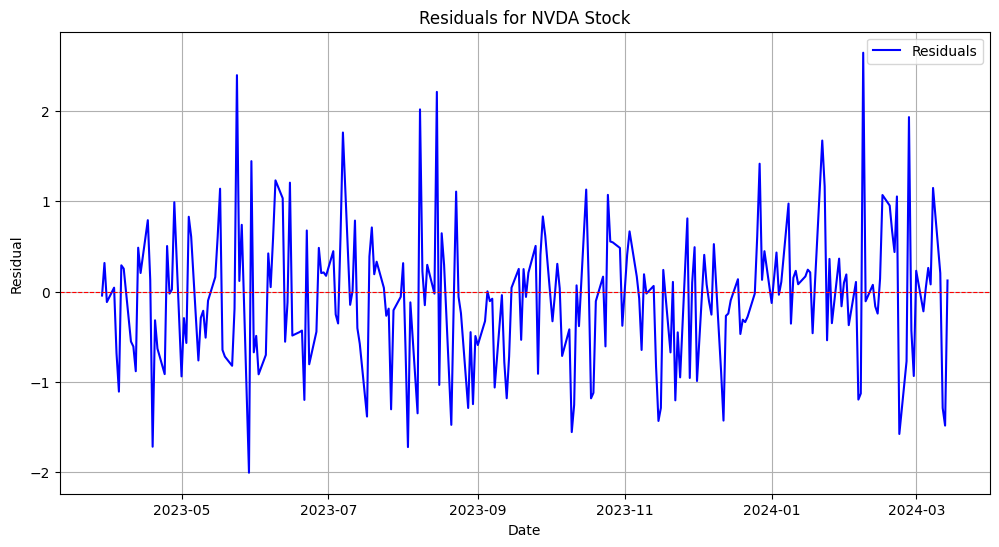

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Select the date range with a daily frequency
dates = pd.date_range(start='2023-03-29', periods=len(nvda_residuals), freq='B')

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(dates, nvda_residuals, label='Residuals', color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residuals for NVDA Stock')
plt.legend()
plt.grid(True)
plt.show()


<font color=green>Q30: (7 Marks) </font>
<br><font color='green'>
By reading carefully the paper **[End-to-End Policy Learning of a Statistical Arbitrage Autoencoder Architecture](https://arxiv.org/pdf/2402.08233.pdf)**, answers the following question:
1. **Summarize the Key Actions**: Highlight the main experiments and methodologies employed by the authors in Section 5.
2. **Reproduction Steps**: Detail the necessary steps required to replicate the authors' approach based on the descriptions provided in the paper.
3. **Proposed Improvement**: Suggest one potential enhancement to the methodology that could potentially increase the effectiveness or efficiency of the model.



## Key Actions: Main Experiments and Methodologies in Section 5

In the paper titled "End-to-End Policy Learning of a Statistical Arbitrage Autoencoder Architecture," Section 5 delves into the core experimental practices and methodologies the researchers adopted. This section is important in understanding how different autoencoder configurations influence the generation of residuals, which are crucial for the proposed trading strategy.

### Model Variants
The research team has tested various autoencoder configurations to identify the most effective model structure for residual generation. Key variations explored include:
- Utilisation of different activation functions, mainly TANH and RELU, to determine their impact on model performance.
- Examination of the effects of including or excluding biases within the network layers.
- Implementation of dropout layers aimed at preventing overfitting and promoting model robustness.
- Adjustments in the architecture, such as changes in the number of hidden layers and nodes, to optimize processing capabilities.

### Residual Extraction
The methodologies for extracting residuals were diverse, incorporating:
- A straightforward approach where predicted standardized returns were subtracted from actual standardized returns.
- An advanced method utilizing the encoder portion of the autoencoder to derive factor returns from the preceding 60 days. These were then regressed against actual returns to estimate factor loadings, with predicted factor returns subtracted from actual returns to derive residuals.
- A modification of the second method, where returns were scaled by volatility to enhance the model’s sensitivity to market dynamics.

### Training and Evaluation
The models underwent rigorous training using standardized returns truncated at three standard deviations to minimize the influence of outliers. The training protocol included:
- A specified lookback period of Tτ trading days, leveraging historical data for model refinement.
- Utilization of the Adam optimizer across 10 epochs aimed at optimizing the weight configurations for ideal performance.

### Backtesting Methodology
The backtesting of the models was meticulously planned:
- Residuals served as inputs for extracting Ornstein-Uhlenbeck (OU) parameters through a 60-day regression analysis.
- The training incorporated 1,000 days of historical data, fine-tuned to maximize the Sharpe ratio.
- An additional 125 days were reserved for out-of-sample testing to evaluate model performance and readiness for subsequent retraining cycles.

### Performance Evaluation Metrics
The effectiveness of the models was gauged using:
- The Sharpe ratio to assess risk-adjusted returns.
- Cumulative returns to measure overall performance over time, providing insights into the profitability of the trading strategies derived from the autoencoder residuals.

## Reproduction Steps

For researchers and practitioners interested in replicating the study, the following detailed steps are outlined:

1. Data Preparation:
   - Gather and preprocess historical stock return data, ensuring standardization and capping anomalies at three standard deviations for consistency.

2. Model Setup:
   - Select an appropriate autoencoder configuration such as one featuring TANH activation, bias inclusion, no dropout, and a singular hidden layer comprising 20 nodes.
   
   *Encoder*
   $$
   F=\operatorname{enc}(Z)=\operatorname{f_e}\left(W^{(0)} Z+b^{(0)}\right)
   $$

   *Decoder*
   $$
   \begin{aligned}
   \hat{Z} & =\operatorname{dec}(F) \\
   & =\operatorname{f_d} \left(W^{(1)} F+b^{(1)}\right) \\
   \end{aligned}
   $$

3. Training Phase:
   - Execute the training of the autoencoder using the standardized returns, applying the Adam optimizer and adhering to a Tτ trading day (252 in the paper), with capped at 3 standard deviations lookback period over 10 epochs.

4. Residual Calculation:
   - Compute residuals directly from the return data or via an advanced encoder-based factor extraction followed by regression analysis.

5. Parameter Estimation:
   - Conduct a 60-day regression to derive OU parameters from the residuals, using a dataset spanning 1,000 days optimized against a Sharpe ratio target, followed by a performance evaluation over the next 125 days.

6. Backtesting and Evaluation:
   - Implement backtesting strategies based on the residuals and evaluate the outcomes using the Sharpe ratio and cumulative returns to validate the approach.

## Proposed Improvement

To further enhance the methodology, the integration of ensemble learning techniques is recommended. This approach involves:
- Model Diversity: Training multiple autoencoder models with varied configurations to explore a broader spectrum of predictive capabilities.
- Aggregation: Aggregating the predictions from these models using averaging, voting, or stacking methods to formulate a more robust and consistent output.
- Regularization: Applying advanced regularization techniques to ensure that the ensemble model remains generalizable to new, unseen data.

Adopting ensemble learning could significantly refine the predictive accuracy of the autoencoder, thereby improving the generation of residuals and enhancing the efficacy of the derived trading strategies. This adjustment helps mitigate potential weaknesses inherent in individual models, resulting in a more stable and reliable system performance.

Minimizing model turnover is a priority, which can be accomplished by retraining the model less frequently or adjusting the Sharpe policy to slow down the model. Additionally, we recommend adding an extra layer of smoothing during portfolio construction after obtaining weights from the Autoencoder. This could involve using advanced time series prediction methods, such as LSTMs or Transformers, trained appropriately. Transaction cost penalties should also be considered. We have reviewed the paper by Bryan Kelly, and all, which proposes an objective that includes transaction costs. In the future, we aim to replicate this paper to create an objective that is more realistic and aligns with the investor's needs.
